In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [55]:


df = pd.read_csv("fake_bills.csv", sep=';')

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [56]:
#Check types 

df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [57]:
#Check missing data

df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [58]:
#Fill missing data, I like to fill missing data with the mode as well, here we are filling with the mean

df["margin_low"] = df["margin_low"].fillna(df.margin_low.mean())

In [59]:
#All good 

df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [60]:
#Converting bool type to numerical 

df["is_genuine"] = df["is_genuine"].astype('category').cat.codes

df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


1 = Genuine 

0 = False

In [61]:
#Checking the balance between Genuine and False in the dataset

print(round(df["is_genuine"].value_counts()/len(df)*100, 2))

1    66.67
0    33.33
Name: is_genuine, dtype: float64


In [62]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [63]:
#Organize columns 

df = df[['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length', 'is_genuine']]

df.rename(columns = {'is_genuine':'target'}, inplace = True)

df

,diagonal,height_left,height_right,margin_low,margin_up,length,target
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,172.69,104.48,103.50,4.40,2.94,113.16,1
3,171.36,103.91,103.94,3.62,3.01,113.51,1
4,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,172.06,104.28,104.06,5.17,3.46,112.25,0


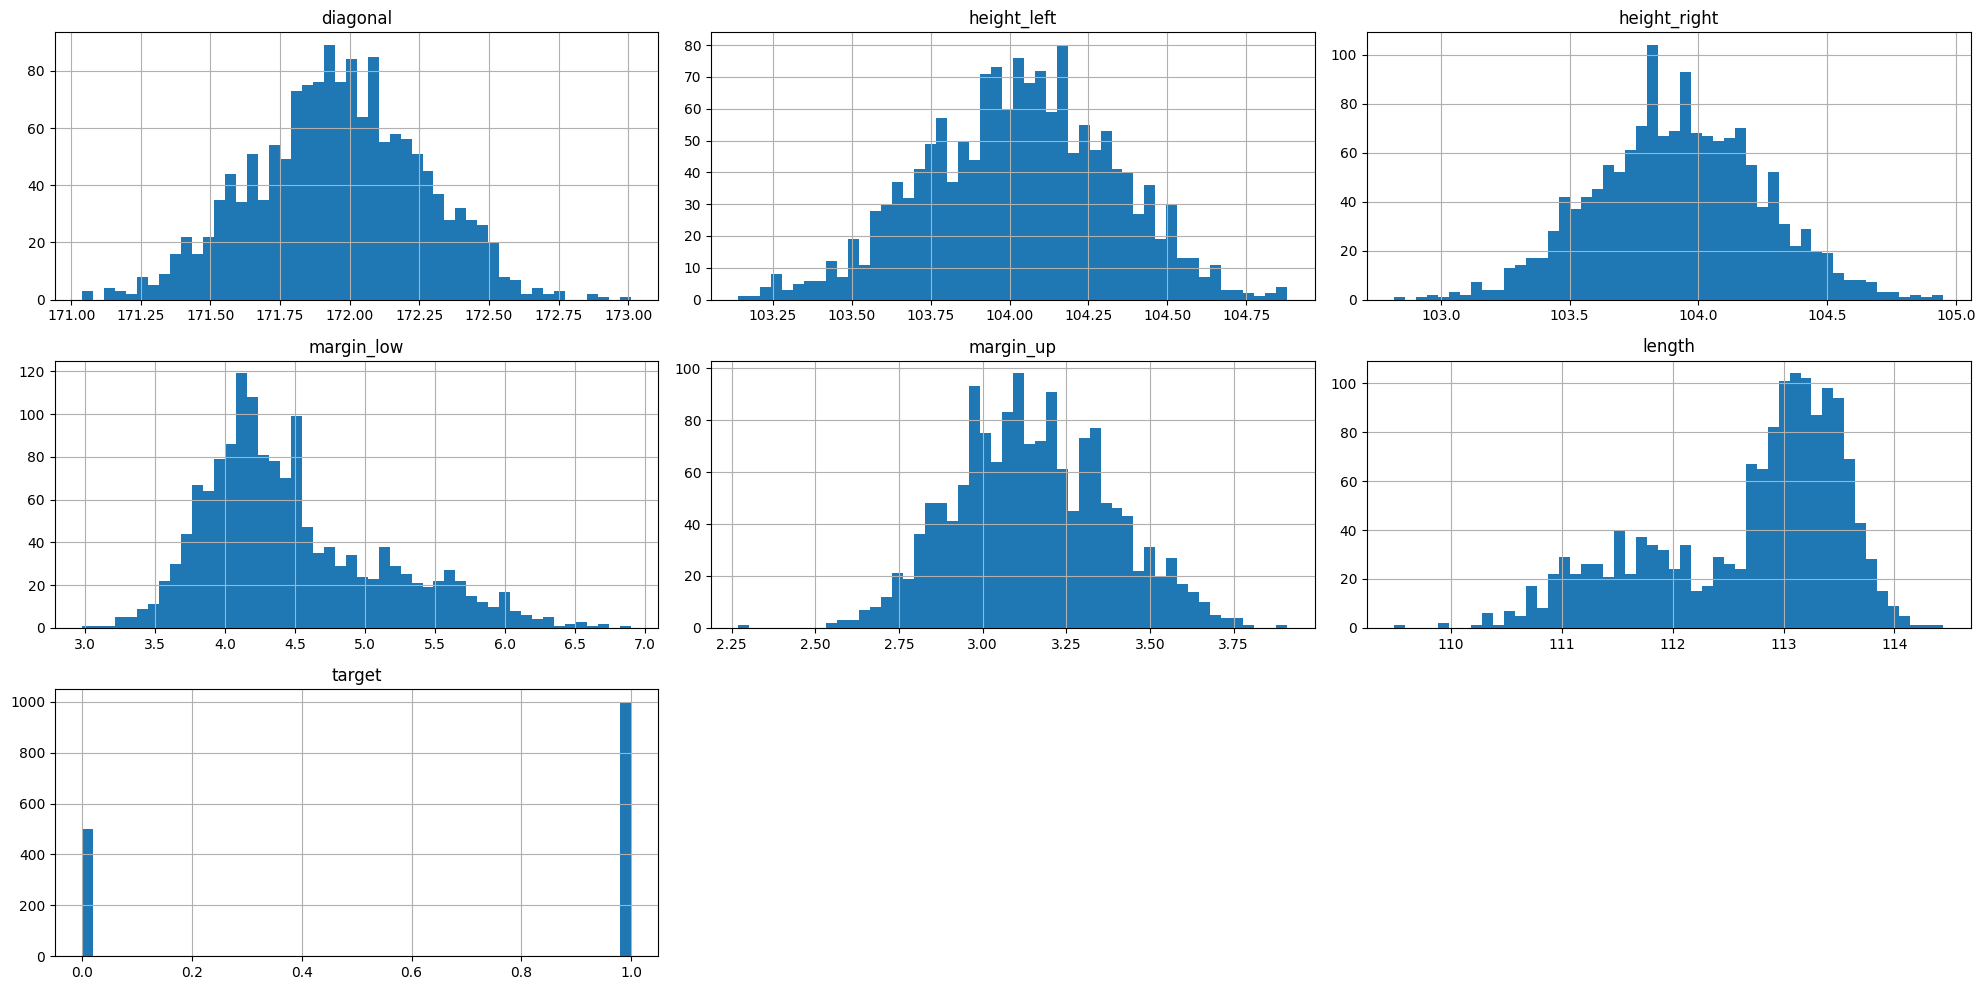

In [64]:
#Quick look into the data distribution 

df.hist(bins= 50,figsize=(20,10))
plt.tight_layout()

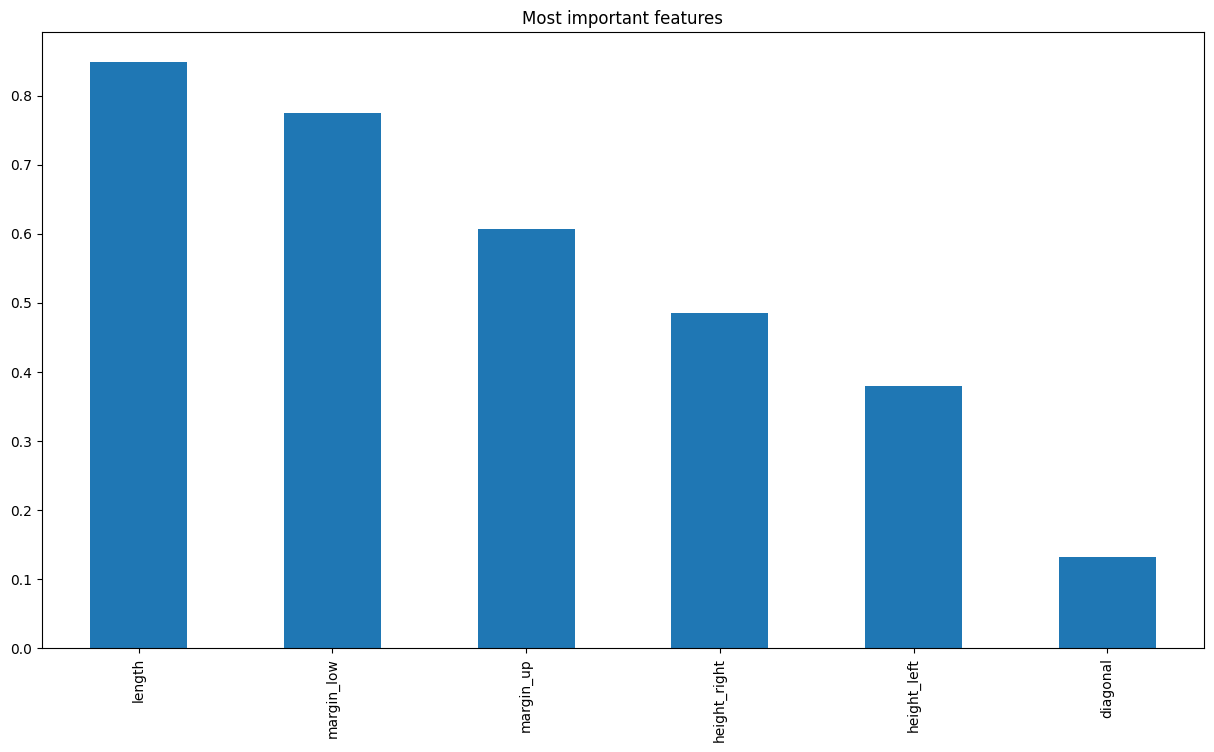

In [65]:
#Let's check the correlation between variables 

plt.figure(figsize=(15,8))
d = df.corr()['target'][:-1].abs().sort_values(ascending=False).plot(kind='bar', title='Most important features')

plt.show()

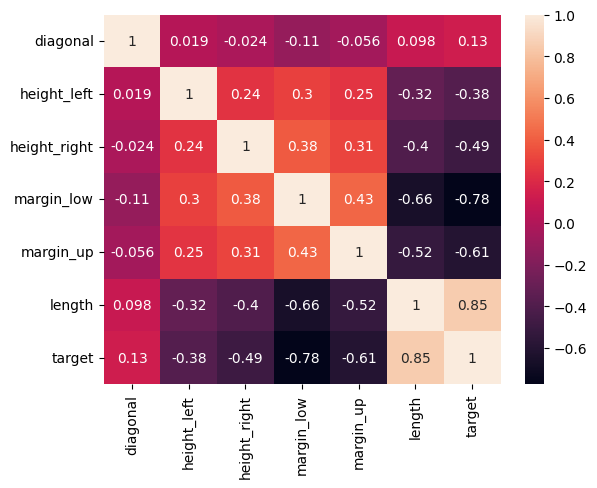

In [66]:
sns.heatmap(df.corr(),annot=True)
plt.show()

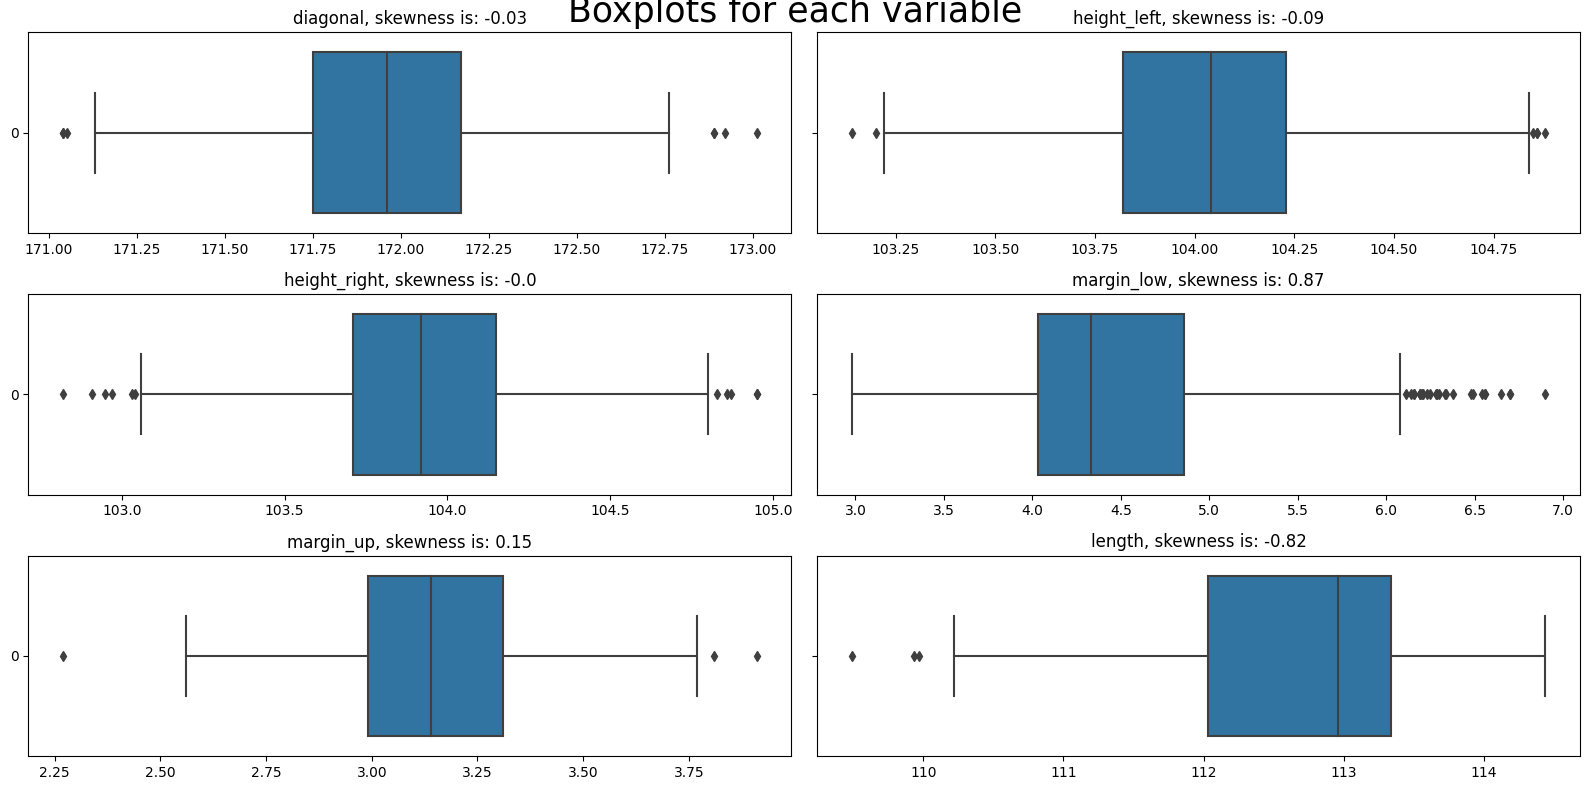

In [67]:
numeric_columns = (list(df.loc[:, 'diagonal':'length']))

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,8))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=2, suptitle='Boxplots for each variable')
plt.tight_layout()

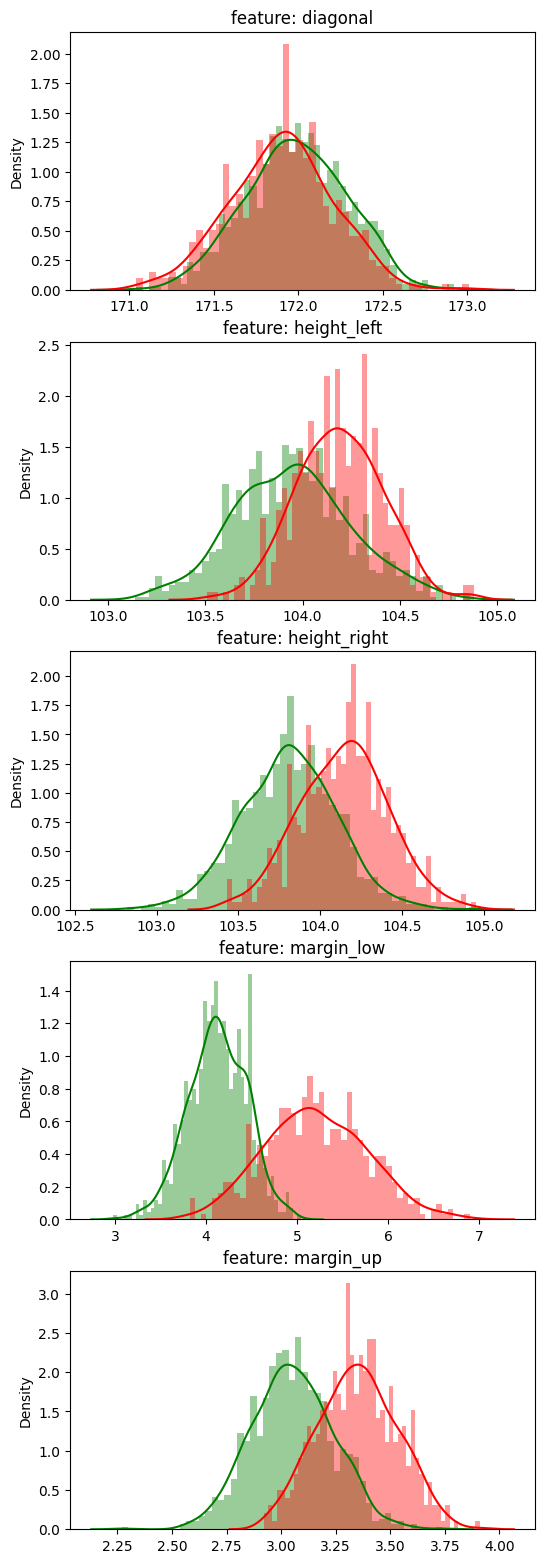

In [68]:
#Checking the distribution for Genuine and Fake bills in each variable 

import seaborn as sns
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:5].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.target == 1], bins=50, color='g')
    sns.distplot(df[col][df.target == 0], bins=50, color='r')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In this preliminary analysis we can see that there is divergence in the distribution of Fake Bill (red) vs Genuine Bills (green). This will help our model to better classify the fake bills. 

In [69]:
from sklearn.model_selection import train_test_split

x = df.drop("target", axis =1)

y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

# **Evaluating the number of clusters we need**

In [70]:
min_clusters = 2
max_clusters = 20 
inertias = np.zeros(shape=(max_clusters - min_clusters +1,))


In [71]:
from sklearn.cluster import KMeans


for i in range(min_clusters, max_clusters + 1):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(x_train)
    inertias[i - min_clusters] = km.inertia_

Text(0, 0.5, 'Sum of Squared Distance')

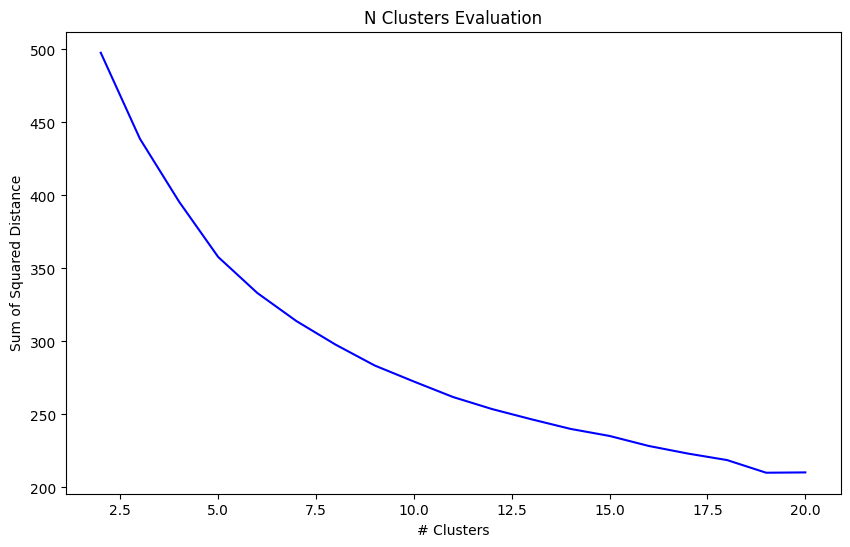

In [72]:
plt.figure(figsize = (10,6))
plt.plot(range(min_clusters, max_clusters + 1), inertias, color = "b")
plt.title("N Clusters Evaluation")
plt.xlabel("# Clusters")
plt.ylabel("Sum of Squared Distance")


Here we have to pick the number of clusters where the line inclination stops being abrupt. Before it starts to stabilize.
In this case it is not very clear where to start, I will pick the number 5, since we have a small break in the line. 


In [73]:
kmodel = KMeans(n_clusters = 5, random_state = 42)
clusters = kmodel.fit(x_train)

In [74]:
#Quick look into the clusters generated 

clusters.labels_

array([2, 1, 4, 2, 1, 1, 1, 2, 1, 1, 3, 4, 1, 1, 2, 4, 3, 1, 1, 3, 2, 3,
       3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 1, 1, 3, 1, 3, 4, 1, 3, 1, 4, 1, 4,
       1, 2, 1, 0, 1, 3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 2, 1, 4, 1, 2,
       3, 2, 0, 1, 3, 3, 1, 1, 1, 1, 4, 2, 1, 4, 1, 3, 3, 0, 3, 3, 4, 3,
       0, 3, 1, 3, 0, 1, 3, 4, 1, 3, 0, 3, 3, 1, 3, 3, 1, 3, 1, 2, 0, 2,
       1, 0, 3, 3, 1, 1, 3, 0, 2, 2, 4, 1, 3, 2, 3, 4, 3, 4, 2, 1, 1, 3,
       3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 4, 3, 0, 3, 1, 4, 3, 1, 1,
       0, 1, 4, 1, 1, 0, 4, 0, 3, 1, 1, 4, 3, 1, 1, 3, 2, 3, 1, 4, 3, 1,
       3, 3, 1, 3, 3, 2, 3, 0, 2, 1, 0, 3, 3, 1, 2, 1, 1, 3, 1, 1, 3, 4,
       4, 3, 0, 3, 3, 1, 1, 3, 4, 4, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3,
       1, 1, 0, 1, 4, 1, 1, 3, 1, 1, 3, 3, 1, 0, 4, 1, 1, 3, 3, 1, 2, 0,
       3, 3, 2, 1, 1, 3, 2, 1, 1, 3, 2, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 0,
       0, 1, 2, 1, 1, 3, 2, 1, 2, 3, 0, 4, 1, 1, 1, 0, 2, 1, 1, 3, 1, 3,
       1, 3, 0, 2, 3, 3, 3, 1, 1, 2, 3, 1, 2, 3, 3,

# Applying the K-means to new data

In [75]:
train_clusters = pd.DataFrame(clusters.labels_, columns = ["Cluster"])
train_clusters["Label"] = y_train.values #Must add .values to avoid index problems

fitted_clusters = kmodel.predict(x_test)
test_clusters = pd.DataFrame(fitted_clusters, columns= ["Cluster"])
test_clusters["Label"] = y_test.values



In [76]:
test_clusters.head()

,Cluster,Label
0,2,0
1,4,0
2,3,1
3,3,1
4,3,1


In [77]:
pd.crosstab(train_clusters["Cluster"], train_clusters["Label"])


Label,0,1
Cluster,,
0,82,0
1,1,245
2,86,1
3,5,251
4,78,1


In [78]:
pd.crosstab(test_clusters["Cluster"], test_clusters["Label"])


Label,0,1
Cluster,,
0,65,0
1,1,236
2,92,1
3,5,265
4,85,0


Here we have to pick the number of clusters where the line inclination stops being abrupt. Before it starts to stabilize.
In this case it is not very clear where to start, I will pick the number 5, since we have a small break in the line. 


Here we are doing a crosstab between predicted('Clusters') and real('label'). The clusters 1 and 3 concentrate most of the Genuine Bills, and we have 3 remaining clusters concentrating the fake bills.

The groups 1 and 3 are better in classifying the Genuine. 

Now we can use this as a classification model. 

In cluster 1, we have 236 Genuine Bills and only 1 Fake bill. That is amazing. 
In cluster 3, we have 265 Genuine Bills and 5 Fake bills.

The remaining clusters have only 1 Genuine Bill that was considered Fake. Surprising results. 


Confusion Matrix for unsupervised Algorithms? Yes!



In [79]:
train_clusters.describe()

,Cluster,Label
count,750.000000,750.000000
mean,2.005333,0.664000
std,1.236936,0.472654
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,1.000000
max,4.000000,1.000000


In [80]:
test_clusters.describe()

,Cluster,Label
count,750.000000,750.000000
mean,2.097333,0.669333
std,1.211810,0.470767
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,1.000000
max,4.000000,1.000000


Here we want to check the mean of each element for each cluster.

In [81]:
train_clusters.groupby("Cluster").mean()

,Label
Cluster,
0,0.000000
1,0.995935
2,0.011494
3,0.980469
4,0.012658


In [82]:
test_clusters.groupby("Cluster").mean()

,Label
Cluster,
0,0.000000
1,0.995781
2,0.010753
3,0.981481
4,0.000000


Here we have 99% concentration of class 1 in the cluster 1, and another 98% concentration of class 1 in the cluster 3.

If the bill you are checking falls into one of these two clusters (1 and 3), there is a great chance that they are Genuine.


This means that the K-means is working. If we have a concentration in the cluster that is different from the concentration of the database it means the K-means is able to detect the classes precisely 

The k-means can be used as a filter to detect Genuine or Fake Bills.

In [83]:
train_clusters.groupby("Cluster")["Label"].describe()[["count","mean"]]

,count,mean
Cluster,,
0,82.0,0.000000
1,246.0,0.995935
2,87.0,0.011494
3,256.0,0.980469
4,79.0,0.012658


In [84]:
test_clusters.groupby("Cluster")["Label"].describe()[["count","mean"]]

,count,mean
Cluster,,
0,65.0,0.000000
1,237.0,0.995781
2,93.0,0.010753
3,270.0,0.981481
4,85.0,0.000000


# Evaluating the Model 

In [85]:
#Applying the rule for each cluster

train_clusters["Predicted"] = np.where(((train_clusters["Cluster"] == 1) | (train_clusters["Cluster"] == 3)), 1, 0)
test_clusters["Predicted"] = np.where(((test_clusters["Cluster"] == 1) | (test_clusters["Cluster"] == 3)), 1, 0)

Here we are saying that if your bill falls into clusters 1 or 3 we will consider it Genuine, if it falls in any other cluster, we will consider it Fake. 

In [86]:
#Confusion matrix for the training

pd.crosstab(train_clusters["Predicted"], train_clusters["Label"])

Label,0,1
Predicted,,
0,246,2
1,6,496


In [87]:
#Confusion matrix for the test

pd.crosstab(test_clusters["Predicted"], test_clusters["Label"])

Label,0,1
Predicted,,
0,242,1
1,6,501


In [88]:
acc_train = (
            (pd.crosstab(train_clusters["Predicted"], train_clusters["Label"])[0][0]
            +pd.crosstab(train_clusters["Predicted"], train_clusters["Label"])[1][1])/train_clusters.shape[0])

In [89]:
acc_test = (
            (pd.crosstab(test_clusters["Predicted"], test_clusters["Label"])[0][0]
            +pd.crosstab(test_clusters["Predicted"], test_clusters["Label"])[1][1])/test_clusters.shape[0])

In [90]:
print("Train Accuracy: ", round(acc_train, 3)*100, "%")
print()
print("Test Accuracy: ", round(acc_test, 3)*100,"%")

Train Accuracy:  98.9 %

Test Accuracy:  99.1 %
